# Ищем математическое ожидание E(ξ)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def check(coloring, i, j):
    a1 =  (i == 0 or not coloring[i - 1, j])
    a2 = (j == 0 or not coloring[i, j - 1])
    a3 = (i == coloring.shape[0] - 1 or not coloring[i + 1, j])
    a4 = (j == coloring.shape[1] - 1 or not coloring[i, j + 1])
    return a1 and a2 and a3 and a4

def make(coloring):
    x=[]
    for i in range (coloring.shape[0]):
        for j in range (coloring.shape[1]):
            if check(coloring, i, j) or coloring[i,j]:
                x.append((i,j))
    return x
                           
def go_next (coloring):
    x = make(coloring) 
    go_next = x[np.random.randint(0, len(x))]
    next_coloring = np.array(coloring)
    next_coloring[go_next[0], go_next[1]]= not coloring[go_next[0], go_next[1]]
    y = make (next_coloring)
    return next_coloring if np.random.uniform() < len(x) / len(y) else coloring

coloring = np.zeros((8,8)).astype('bool')
sample = []

for i in range(5000):
    sample.append(coloring.sum())
    coloring = go_next (coloring)
print("Математическое ожидание E(ξ)= ")
np.array(sample).mean()

Математическое ожидание E(ξ)= 


15.228

Таким образом, среднее количество закрашенных вершин в таком графе - 15

# Стационарность

In [38]:
def g_test(x, start=0.4, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)
g_test(sample[1000:])


Ttest_indResult(statistic=0.9430447034137013, pvalue=0.3456607218585872)

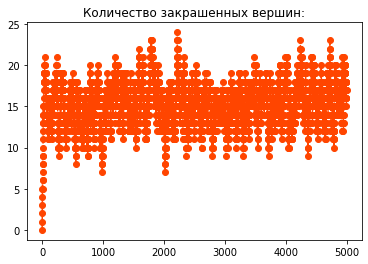

In [60]:
plt.title("Количество закрашенных вершин:")
plt.plot(sample, 'o--', color = 'orangered')
plt.show()

# График распределения n(ξ)


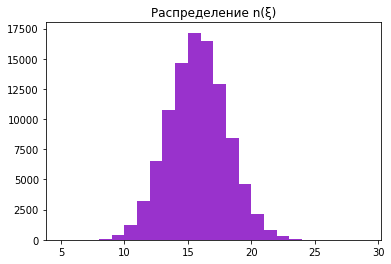

In [40]:
plt.hist(sample, bins=np.arange(5, 30), color ='darkorchid')
plt.title("Распределение n(ξ)")
plt.show()